# Interface of β2 Adrenergic Receptor in Complex with Empty Gs-Protein

In [1]:
import mdtraj as md
import mdciao

### Download example data and load into the namespace

In [2]:
import numpy as np
import os
if not os.path.exists("mdciao_example"):
    mdciao.examples.fetch_example_data("b2ar@Gs")
traj = md.load("mdciao_example/traj.xtc",top="mdciao_example/prot.pdb")

Unzipping to 'mdciao_example'


### Create consensus labeler objects

In [3]:
GPCR = mdciao.nomenclature.LabelerGPCR("adrb2_human")
CGN = mdciao.nomenclature.LabelerCGN("3SN6")

No local file ./adrb2_human.xlsx found, checking online in
https://gpcrdb.org/services/residues/extended/adrb2_human ...done!
Please cite the following reference to the GPCRdb:
 * Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function
   Nucleic Acids Research 49, D335--D343
   https://doi.org/10.1093/nar/gkaa1080
For more information, call mdciao.nomenclature.references()
done without 404, continuing.
Using CGN-nomenclature, please cite
 * Flock et al, (2015) Universal allosteric mechanism for G$\alpha$ activation by GPCRs
   Nature 2015 524:7564 524, 173--179
   https://doi.org/10.1038/nature14663
No local file ./CGN_3SN6.txt found, checking online in
https://www.mrc-lmb.cam.ac.uk/CGN/lookup_results/3SN6.txt ...done without 404, continuing.
No local PDB file for 3SN6 found in directory '.', checking online in 
https://files.rcsb.org/download/3SN6.pdb ...found! Continuing normally


### Guess molecular fragments
This would be done anyway by the `mdciao.cli.interface` call in the cell below, here we do it have the fragments defined in the namespace

In [4]:
fragments = mdciao.fragments.get_fragments(traj.top);
fragment_names = ["Galpha", "Gbeta", "Ggamma","B2AR","P0G"]

Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    354 AAs     LEU4 (     0) -   LEU394 (353   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   354) -   ASN340 (693   ) (1) 
fragment      2 with     66 AAs     ALA2 (   694) -    PHE67 (759   ) (2) 
fragment      3 with    283 AAs    GLU30 (   760) -   LEU340 (1042  ) (3)  resSeq jumps
fragment      4 with      1 AAs   P0G395 (  1043) -   P0G395 (1043  ) (4) 


### Compute G$\alpha$-B2AR interface
Using the above fragment definitions

In [5]:
intf = mdciao.cli.interface(traj,
                            title="3SN6 beta2AR-Galpha interface",
                            fragments=fragments, fragment_names = fragment_names,                             
                            frag_idxs_group_1=[0], 
                            frag_idxs_group_2=[3],
                            GPCR_uniprot=GPCR, CGN_PDB=CGN,
                            accept_guess=True, no_disk=True, figures=False)

Will compute contact frequencies for trajectories:
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'user input by residue array or range' these fragments were found
fragment      0 with    354 AAs     LEU4 (     0) -   LEU394 (353   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   354) -   ASN340 (693   ) (1) 
fragment      2 with     66 AAs     ALA2 (   694) -    PHE67 (759   ) (2) 
fragment      3 with    283 AAs    GLU30 (   760) -   LEU340 (1042  ) (3)  resSeq jumps
fragment      4 with      1 AAs   P0G395 (  1043) -   P0G395 (1043  ) (4) 
GPCR-labels align best with fragments: [3] (first-last: GLU30-LEU340).

These are the GPCR fragments mapped onto your topology:
    TM1 with     32 AAs    GLU30@1.29x29   (   760) -    PHE61@1.60x60   (791   ) (TM1) 
   ICL1 with      4 AAs    GLU62@12.48x48  (   792) -    GLN65@12.51x51  (795   ) (ICL1) 
    TM2 with     32 AAs    THR66@2.37x37   (   796) -    

  0%|                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.98s/it]

These 20 contacts capture 12.03 (~77%) of the total frequency 15.54 (over 20307 input contacts)
As orientation value, the first 31 ctcs already capture 90.0% of 15.54.
The 31-th contact has a frequency of 0.14


    freq                            label residue idxs    sum
0   1.00   D381@G.H5.13    - Q229@5.68x68      340 956   1.00
1   1.00   R385@G.H5.17    - Q229@5.68x68      344 956   2.00
2   1.00   D381@G.H5.13    - K232@5.71x71      340 959   3.00
3   0.98   Q384@G.H5.16    - I135@3.54x54      343 865   3.98
4   0.96      T350@G.h4s6.3   - R239@ICL3      309 966   4.93
5   0.85   E392@G.H5.24    - T274@6.36x36      351 976   5.79
6   0.68   Q384@G.H5.16    - Q229@5.68x68      343 956   6.47
7   0.64   H387@G.H5.19    - A134@3.53x53      346 864   7.10
8   0.57   Y391@G.H5.23    - T274@6.36x36      350 976   7.67
9   0.55   Y358@G.h4s6.20  - E237@5.76x76      317 964   8.23
10  0.49   R385@G.H5.17    - K232@5.71x71      344 959   8.71
11  0.47   L394@G.H5.26    - K270@6.32x32   

### Plot each residues's participation in the interface

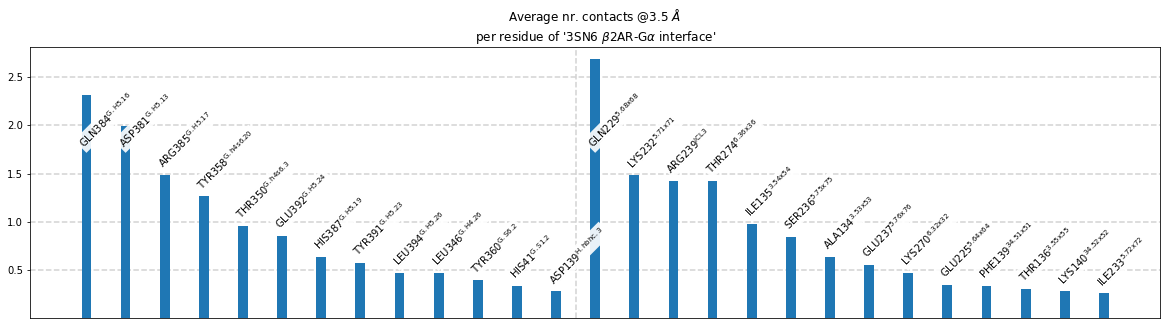

In [6]:
ifig = intf.plot_frequency_sums_as_bars(3.5, title_str = intf.name, 
                                 list_by_interface=True, 
                                 interface_vline=True);
ifig.figure.savefig("intf.svg")

### Plot contact matrix

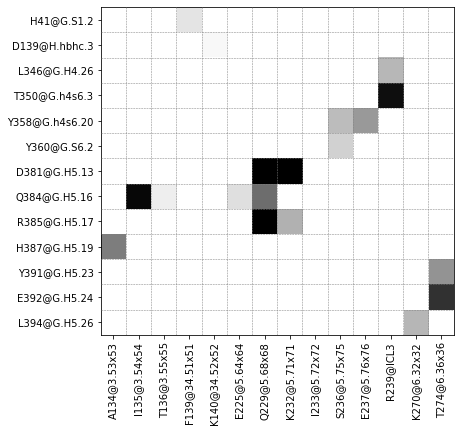

In [7]:
ifig, iax = intf.plot_interface_frequency_matrix(3.5, grid=True, pixelsize=.5);
ifig.savefig("matrix.svg")

### Flareplot
We combine a lot of information into one single flareplot:  

* the molecular topology with sub-fragments and consensus labels, 

* the secondary structure, 

* the individual contact-pairs 

* the participation of each residue in the interface.

Drawing this many dots (206 residues + 13 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


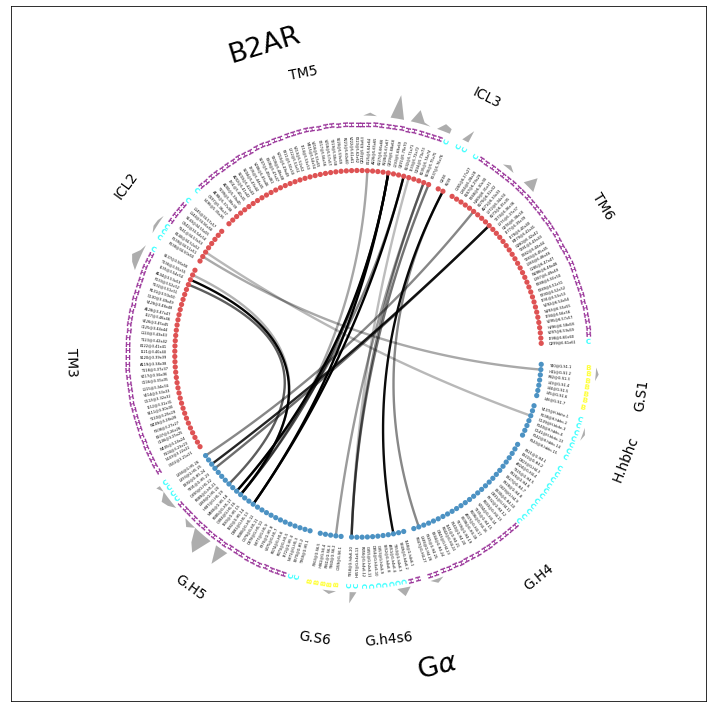

In [8]:
ifig, iax = intf.plot_freqs_as_flareplot(3.5, 
                                         fragments=fragments, fragment_names = fragment_names,  
                                         scheme="consensus_sparse", consensus_maps=[GPCR, CGN], 
                                         aura=intf.frequency_sum_per_residue_idx_dict(3.5,return_array=True),
                                         SS=True)
ifig.figure.savefig("flare.svg")

### Coarse-Grained Frequencies and Flareplots

TM3 ICL2  TM5 ICL3  TM6
G.S1         0.3               
H.hbhc       0.3               
G.H4                   0.5     
G.h4s6            1.3  1.0     
G.S6              0.4          
G.H5    1.9       4.5       1.9

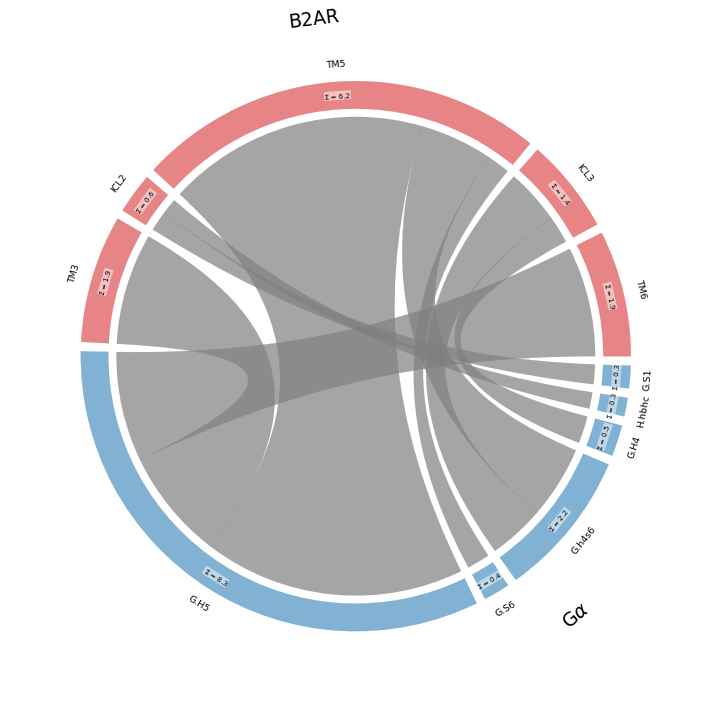

In [9]:
ifig, iax = intf.plot_freqs_as_flareplot(3.5, 
                                         fragments=fragments, fragment_names = fragment_names,  
                                         consensus_maps=[GPCR, CGN],                                         
                                         coarse_grain=True,
                                        )
intf.frequency_as_contact_matrix_CG(3.5, fragments=fragments, fragment_names = fragment_names,
                                    consensus_labelers=[GPCR, CGN],
                                    interface=True).round(1).replace(0,"")  


### Grab a representative frame
This frame will be used to plot the interface frequencies as a 3D heatmap (see `frequency_to_bfactor` below).

In [10]:
repframe = intf.repframes(return_traj=True)[-1][0]

Returning frame 118 of traj nr. 0: <mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>


### Save the interface as a heatmap and view externally

In [11]:
intf.frequency_to_bfactor(3.5, pdbfile="interface_heatmap.pdb", 
                          geom=repframe, 
                          interface_sign=True
                         );

Contact frequencies stored as signed bfactor in 'interface_heatmap.pdb'


### Save all mdciao objects for later reuse
We can save all mdciao objects to numpy .npy (pickle) files and later reload them without having to compute everything again.

In [12]:
import numpy as np
np.save("GPCR.npy", GPCR)
np.save("CGN.npy",CGN)
np.save("intf.npy",intf)